In [17]:
import pandas as pd

file_path = r"D:\Posisi Kredit Usaha Mikro, Kecil, dan Menengah (UMKM) pada Bank Umum__, 2020-2022 (1).xlsx"  

df = pd.read_excel(file_path, sheet_name="belum diolah ", skiprows=4)
df.columns = ['Sektor Usaha', '2020', '2021', '2022', '2023']

df.head()

,Sektor Usaha,2020,2021,2022,2023
0,"Pertanian, Perburuan dan Kehutanan",130012,161456,214198,244970
1,Perikanan,11416,14751,16021,17332
2,Pertambangan dan Penggalian,8039,8969,7080,8146
3,Industri Pengolahan,112601,128136,135619,145212
4,"Listrik, gas dan air",4039,3808,3565,4400


In [21]:
import pandas as pd

file_path = r"D:\Posisi Kredit Usaha Mikro, Kecil, dan Menengah (UMKM) pada Bank Umum__, 2020-2022 (1).xlsx"  

df = pd.read_excel(file_path, sheet_name="belum diolah ", skiprows=4)
df.columns = ['Sektor Usaha', '2020', '2021', '2022', '2023']
# Tampilkan seluruh baris & kolom (tidak terpotong)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Tampilkan dataframe
print(df)

                                         Sektor Usaha     2020     2021  \
0                  Pertanian, Perburuan dan Kehutanan   130012   161456   
1                                           Perikanan    11416    14751   
2                         Pertambangan dan Penggalian     8039     8969   
3                                 Industri Pengolahan   112601   128136   
4                                Listrik, gas dan air     4039     3808   
5                                          Konstruksi    59164    57583   
6                        Perdagangan Besar dan Eceran   530653   601384   
7                Penyediaan akomodasi dan makan minum    50623    58603   
8            Transportasi, pergudangan dan komunikasi    42710    41876   
9                                  Perantara Keuangan    12167    10001   
10  Real Estate, Usaha Persewaan, dan Jasa Perusahaan    50702    48499   
11  Admistrasi Pemerintahan, Pertahanan dan Jamina...      100      214   
12                       

In [27]:
for year in ['2020', '2021', '2022', '2023']:
    df[year] = pd.to_numeric(df[year], errors='coerce')

In [37]:
df['Total'] = df[['2020', '2021', '2022', '2023']].sum(axis=1)
df['Growth (%)'] = ((df['2023'] - df['2020']) / df['2020']) * 100
print(df)

                                         Sektor Usaha       2020       2021  \
0                  Pertanian, Perburuan dan Kehutanan   130012.0   161456.0   
1                                           Perikanan    11416.0    14751.0   
2                         Pertambangan dan Penggalian     8039.0     8969.0   
3                                 Industri Pengolahan   112601.0   128136.0   
4                                Listrik, gas dan air     4039.0     3808.0   
5                                          Konstruksi    59164.0    57583.0   
6                        Perdagangan Besar dan Eceran   530653.0   601384.0   
7                Penyediaan akomodasi dan makan minum    50623.0    58603.0   
8            Transportasi, pergudangan dan komunikasi    42710.0    41876.0   
9                                  Perantara Keuangan    12167.0    10001.0   
10  Real Estate, Usaha Persewaan, dan Jasa Perusahaan    50702.0    48499.0   
11  Admistrasi Pemerintahan, Pertahanan dan Jamina..

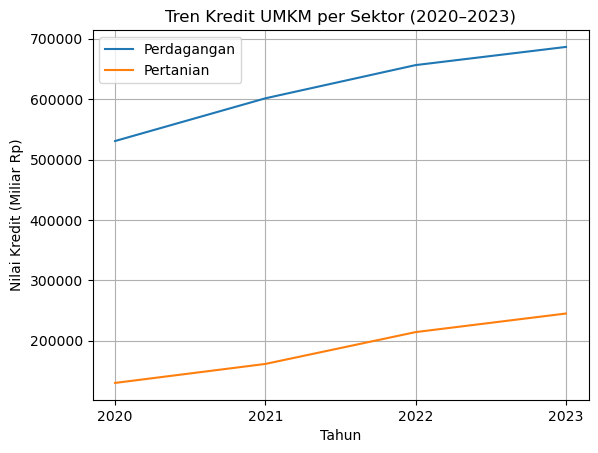

In [39]:
import matplotlib.pyplot as plt

plt.plot(['2020', '2021', '2022', '2023'], [530653, 601384, 656418, 686499], label='Perdagangan')
plt.plot(['2020', '2021', '2022', '2023'], [130012, 161456, 214198, 244970], label='Pertanian')

plt.title("Tren Kredit UMKM per Sektor (2020–2023)")
plt.xlabel("Tahun")
plt.ylabel("Nilai Kredit (Miliar Rp)")
plt.legend()
plt.grid(True)
plt.show()


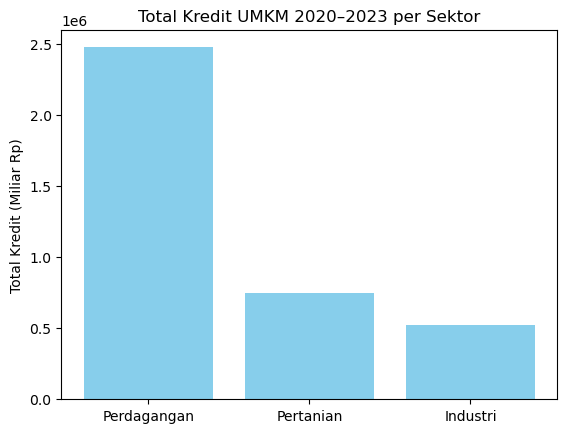

In [41]:
sektor = ['Perdagangan', 'Pertanian', 'Industri']
total_kredit = [2474954, 750636, 521568]

plt.bar(sektor, total_kredit, color='skyblue')
plt.title("Total Kredit UMKM 2020–2023 per Sektor")
plt.ylabel("Total Kredit (Miliar Rp)")
plt.show()


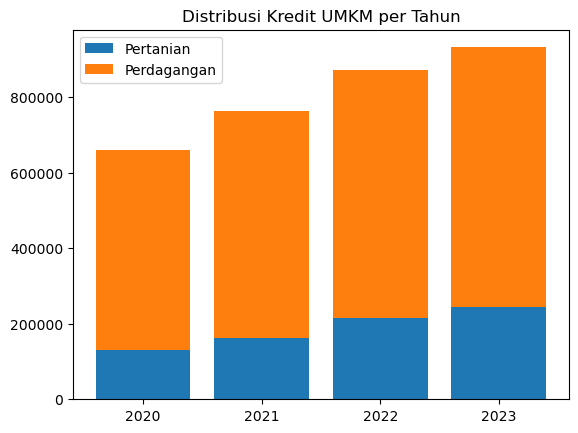

In [43]:
import numpy as np

tahun = ['2020', '2021', '2022', '2023']
pertanian = [130012, 161456, 214198, 244970]
perdagangan = [530653, 601384, 656418, 686499]

x = np.arange(len(tahun))
plt.bar(x, pertanian, label='Pertanian')
plt.bar(x, perdagangan, bottom=pertanian, label='Perdagangan')
plt.xticks(x, tahun)
plt.legend()
plt.title("Distribusi Kredit UMKM per Tahun")
plt.show()


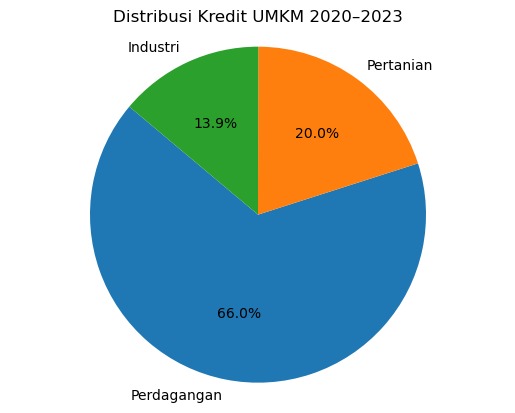

In [45]:
labels = ['Perdagangan', 'Pertanian', 'Industri']
values = [2474954, 750636, 521568]

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Distribusi Kredit UMKM 2020–2023")
plt.axis('equal')
plt.show()


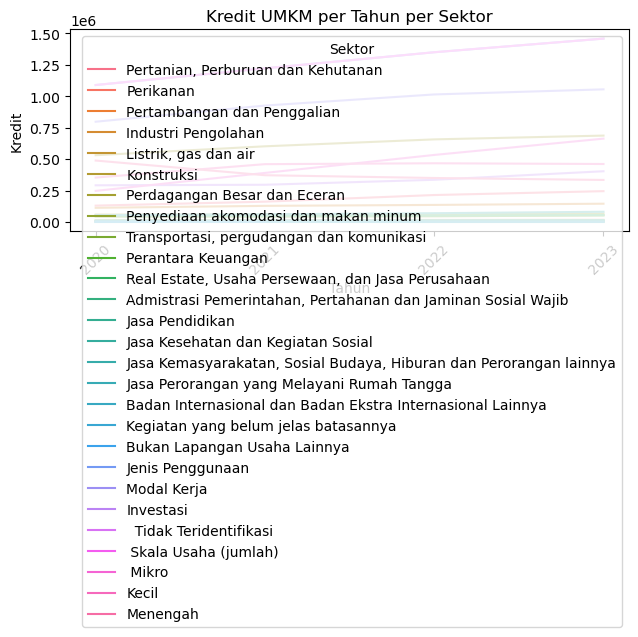

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df_long, x='Tahun', y='Kredit', hue='Sektor')
plt.xticks(rotation=45)
plt.title('Kredit UMKM per Tahun per Sektor')
plt.tight_layout()
plt.show()


In [57]:
# Hitung total kredit per sektor
top_sektor = df_long.groupby('Sektor')['Kredit'].sum().nlargest(10).index

# Filter hanya 10 sektor teratas
df_top = df_long[df_long['Sektor'].isin(top_sektor)]

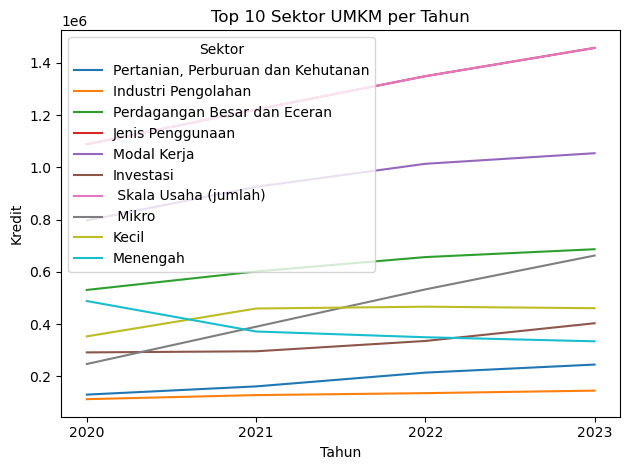

In [59]:
sns.lineplot(data=df_top, x='Tahun', y='Kredit', hue='Sektor')
plt.xticks(rotation=0)
plt.title('Top 10 Sektor UMKM per Tahun')
plt.tight_layout()
plt.show()


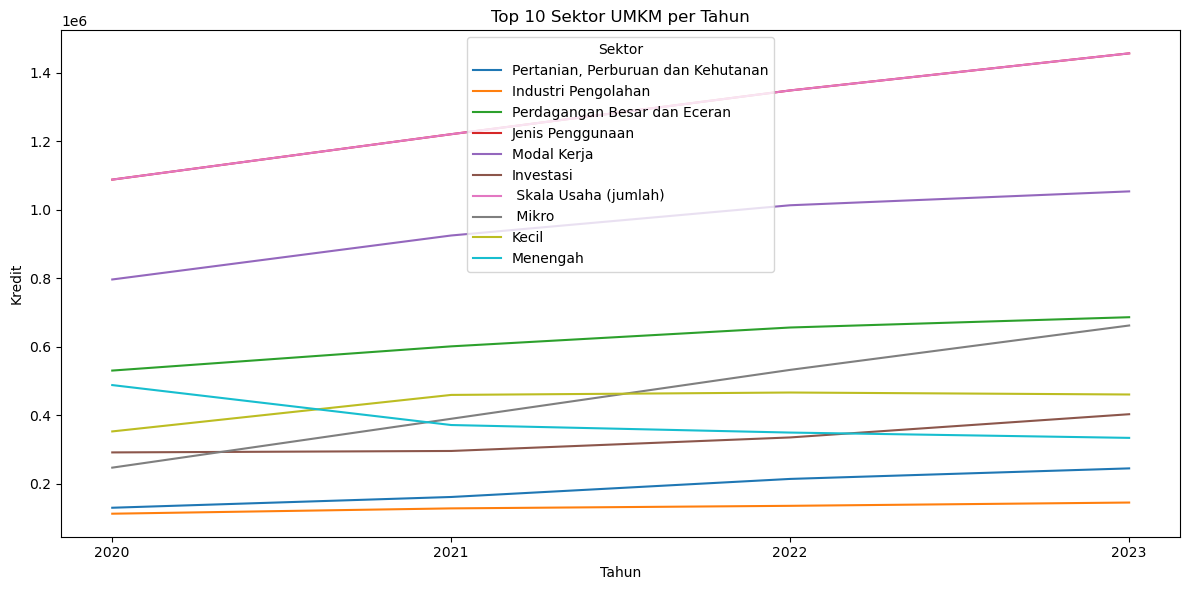

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil 10 sektor dengan kredit terbesar
top_sektor = df_long.groupby('Sektor')['Kredit'].sum().nlargest(10).index
df_top = df_long[df_long['Sektor'].isin(top_sektor)]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top, x='Tahun', y='Kredit', hue='Sektor')
plt.xticks(rotation=0)
plt.title('Top 10 Sektor UMKM per Tahun')
plt.tight_layout()
plt.show()


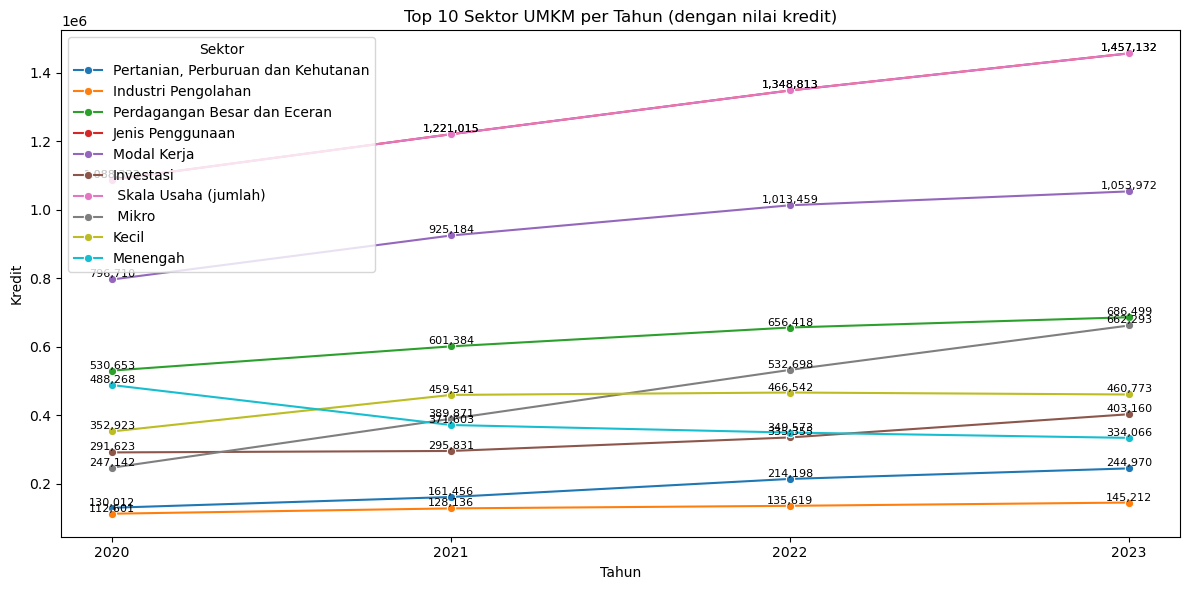

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil 10 sektor dengan total kredit terbesar
top_sektor = df_long.groupby('Sektor')['Kredit'].sum().nlargest(10).index
df_top = df_long[df_long['Sektor'].isin(top_sektor)]

# Buat figure & plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=df_top, x='Tahun', y='Kredit', hue='Sektor', marker='o')

# Tambahkan label angka di setiap titik
for i in range(df_top.shape[0]):
    row = df_top.iloc[i]
    ax.text(
        x=row['Tahun'], 
        y=row['Kredit'], 
        s=f"{int(row['Kredit']):,}",  # format ribuan pakai koma
        fontsize=8,
        color='black',
        ha='center',
        va='bottom'
    )

# Format sumbu x dan judul
plt.xticks(rotation=0)
plt.title('Top 10 Sektor UMKM per Tahun (dengan nilai kredit)')
plt.tight_layout()
plt.show()

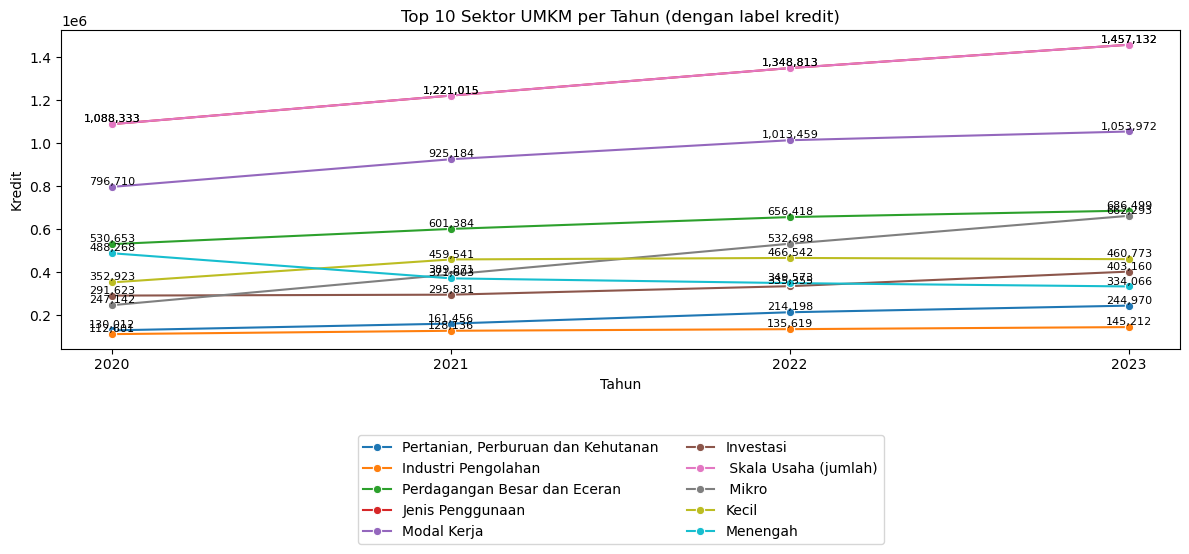

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil 10 sektor kredit terbesar
top_sektor = df_long.groupby('Sektor')['Kredit'].sum().nlargest(10).index
df_top = df_long[df_long['Sektor'].isin(top_sektor)]

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=df_top, x='Tahun', y='Kredit', hue='Sektor', marker='o')

# Tambahkan angka di setiap titik
for i in range(df_top.shape[0]):
    row = df_top.iloc[i]
    ax.text(row['Tahun'], row['Kredit'], f"{int(row['Kredit']):,}", 
            fontsize=8, color='black', ha='center', va='bottom')

# Pindahkan legend ke bawah
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2)

plt.xticks(rotation=0)
plt.title('Top 10 Sektor UMKM per Tahun (dengan label kredit)')
plt.tight_layout()
plt.show()


In [79]:
df_pivot = df_long.pivot(index='Tahun', columns='Sektor', values='Kredit')
df_growth = df_pivot.pct_change(fill_method=None).reset_index()

<Axes: xlabel='Sektor', ylabel='Tahun'>

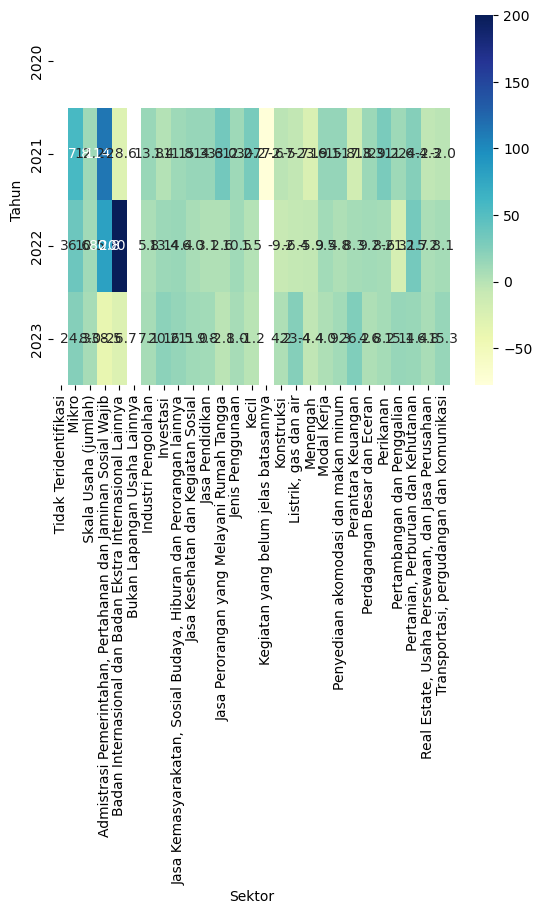

In [81]:
sns.heatmap(df_growth.set_index('Tahun') * 100, annot=True, fmt=".1f", cmap="YlGnBu")

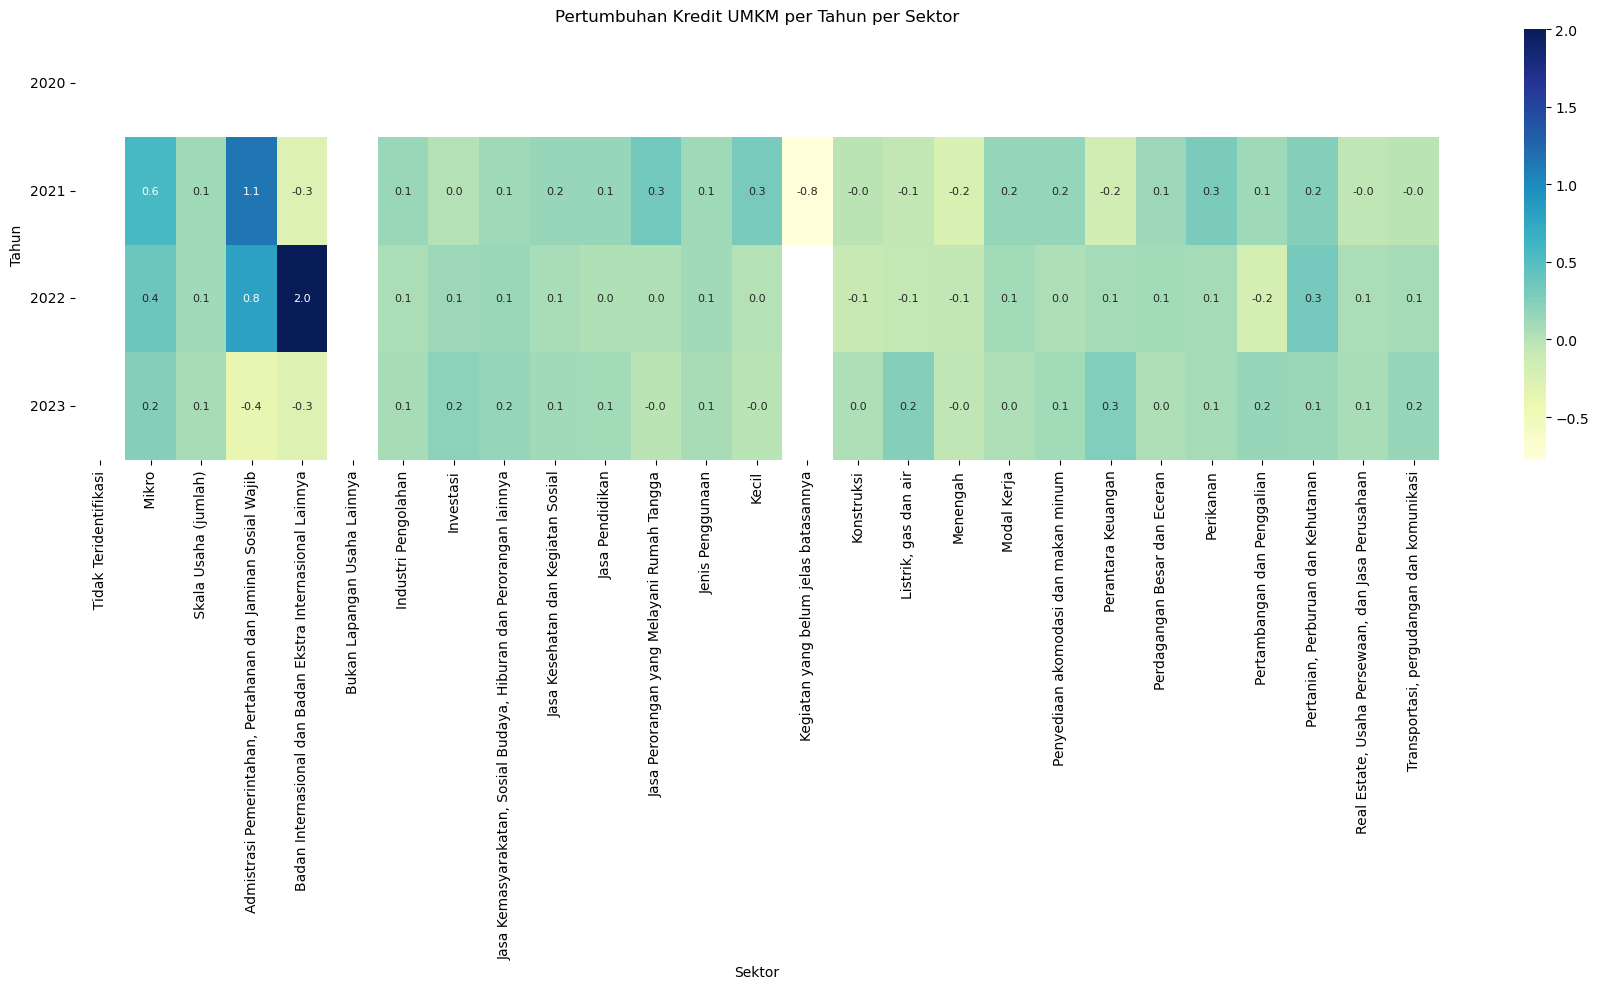

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))  # Lebarkan agar tidak sempit
sns.heatmap(df_growth.set_index('Tahun'), 
            cmap='YlGnBu', 
            annot=True,         # ✅ Menampilkan angka
            fmt=".1f",           # Format angka: 1 angka di belakang koma
            annot_kws={"size": 8})  # Ukuran tulisan angka

plt.title("Pertumbuhan Kredit UMKM per Tahun per Sektor")
plt.xticks(rotation=90)  # Putar nama sektor agar tidak tumpang tindih
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [83]:
df_growth_melt = df_growth.melt(id_vars='Tahun', var_name='Sektor', value_name='Growth')
print(df_growth_melt.sort_values('Growth', ascending=False).head())


   Tahun                                             Sektor    Growth
18  2022  Badan Internasional dan Badan Ekstra Internasi...  2.000000
13  2021  Admistrasi Pemerintahan, Pertahanan dan Jamina...  1.140000
14  2022  Admistrasi Pemerintahan, Pertahanan dan Jamina...  0.808411
5   2021                                              Mikro  0.577518
6   2022                                              Mikro  0.366344


In [107]:
total_kredit = df_long.groupby('Sektor')['Kredit'].sum().sort_values(ascending=False)

In [75]:
df_first = df_long[df_long['Tahun'] == '2020']
df_last = df_long[df_long['Tahun'] == '2023']

growth = pd.merge(df_first, df_last, on='Sektor', suffixes=('_2020', '_2023'))
growth['growth_pct'] = (growth['Kredit_2023'] - growth['Kredit_2020']) / growth['Kredit_2020'] * 100


In [109]:
total_kredit = df_long.groupby('Sektor', as_index=False)['Kredit'].sum()
total_kredit = total_kredit.sort_values('Kredit', ascending=False)
print(total_kredit)

                                               Sektor     Kredit
2                                Skala Usaha (jumlah)  5115293.0
12                                   Jenis Penggunaan  5115293.0
18                                        Modal Kerja  3789325.0
21                       Perdagangan Besar dan Eceran  2474954.0
1                                               Mikro  1832004.0
13                                              Kecil  1739779.0
17                                           Menengah  1543510.0
7                                           Investasi  1325969.0
24                 Pertanian, Perburuan dan Kehutanan   750636.0
6                                 Industri Pengolahan   521568.0
8   Jasa Kemasyarakatan, Sosial Budaya, Hiburan da...   266414.0
19               Penyediaan akomodasi dan makan minum   237716.0
15                                         Konstruksi   223487.0
25  Real Estate, Usaha Persewaan, dan Jasa Perusahaan   204725.0
26           Transportasi

In [111]:
total_kredit = df_long.groupby('Sektor')['Kredit'].sum().sort_values(ascending=False)
print(total_kredit)


Sektor
 Skala Usaha (jumlah)                                                 5115293.0
Jenis Penggunaan                                                      5115293.0
Modal Kerja                                                           3789325.0
Perdagangan Besar dan Eceran                                          2474954.0
 Mikro                                                                1832004.0
Kecil                                                                 1739779.0
Menengah                                                              1543510.0
Investasi                                                             1325969.0
Pertanian, Perburuan dan Kehutanan                                     750636.0
Industri Pengolahan                                                    521568.0
Jasa Kemasyarakatan, Sosial Budaya, Hiburan dan Perorangan lainnya     266414.0
Penyediaan akomodasi dan makan minum                                   237716.0
Konstruksi                       

C:\Users\Huawei\AppData\Local\Temp\ipykernel_7316\1569159882.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_kredit, x='Kredit', y='Sektor', palette='viridis')


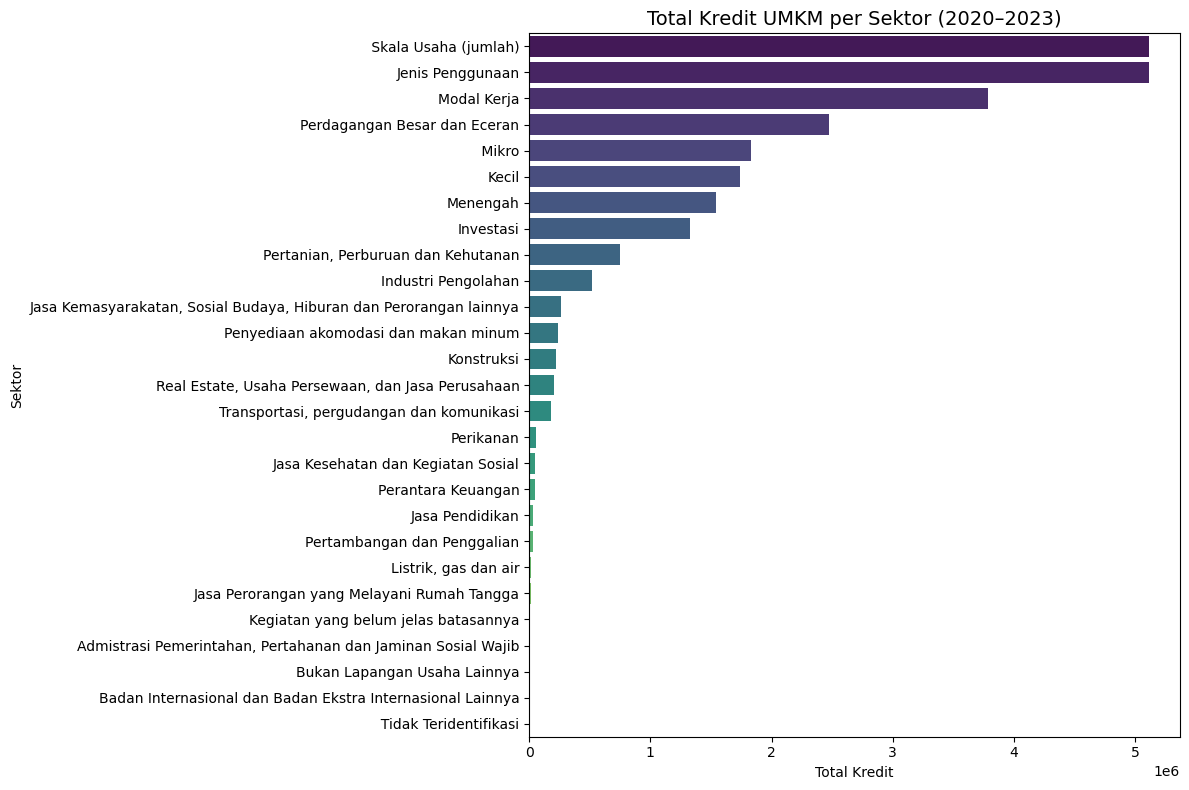

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Urutkan berdasarkan total kredit
total_kredit = df_long.groupby('Sektor', as_index=False)['Kredit'].sum()
total_kredit = total_kredit.sort_values('Kredit', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=total_kredit, x='Kredit', y='Sektor', palette='viridis')
plt.title('Total Kredit UMKM per Sektor (2020–2023)', fontsize=14)
plt.xlabel('Total Kredit')
plt.ylabel('Sektor')
plt.tight_layout()
plt.show()


C:\Users\Huawei\AppData\Local\Temp\ipykernel_7316\4219851993.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=total_kredit, x='Kredit', y='Sektor', palette='viridis')


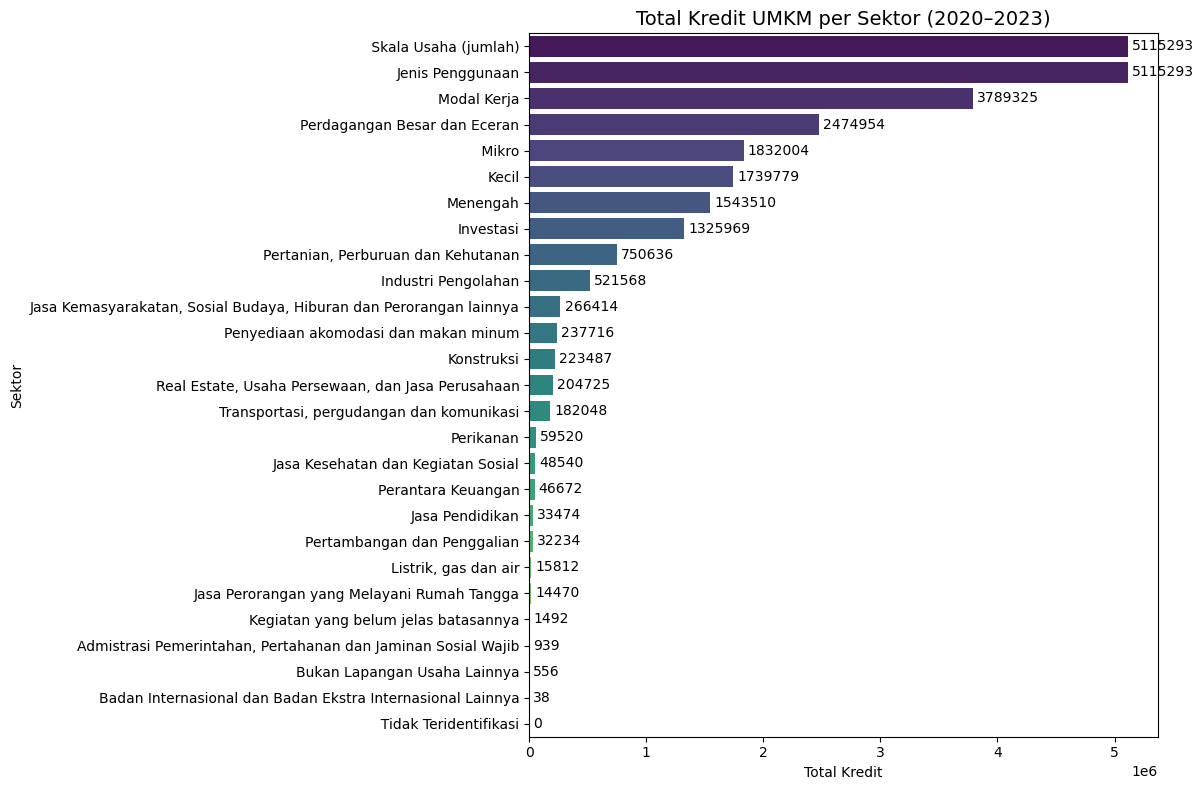

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Urutkan berdasarkan total kredit
total_kredit = df_long.groupby('Sektor', as_index=False)['Kredit'].sum()
total_kredit = total_kredit.sort_values('Kredit', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=total_kredit, x='Kredit', y='Sektor', palette='viridis')
plt.title('Total Kredit UMKM per Sektor (2020–2023)', fontsize=14)
plt.xlabel('Total Kredit')
plt.ylabel('Sektor')

# Tambahkan keterangan angka di ujung batang
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', padding=3)  # '%.0f' untuk membulatkan ke angka bulat

plt.tight_layout()
plt.show()


In [121]:
total_kredit = df_long.groupby('Sektor', as_index=False)['Kredit'].sum()
total_kredit_df = df_long.groupby('Sektor', as_index=False)['Kredit'].sum()

In [123]:
# Urutkan data
df_sorted = df_long.sort_values(by=['Sektor', 'Tahun'])

# Hitung pertumbuhan YoY
df_sorted['Growth'] = df_sorted.groupby('Sektor')['Kredit'].pct_change() * 100


C:\Users\Huawei\AppData\Local\Temp\ipykernel_7316\1989256973.py:5: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_sorted['Growth'] = df_sorted.groupby('Sektor')['Kredit'].pct_change() * 100


C:\Users\Huawei\AppData\Local\Temp\ipykernel_7316\1107303398.py:22: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_sorted['Growth'] = df_sorted.groupby('Sektor')['Kredit'].pct_change() * 100


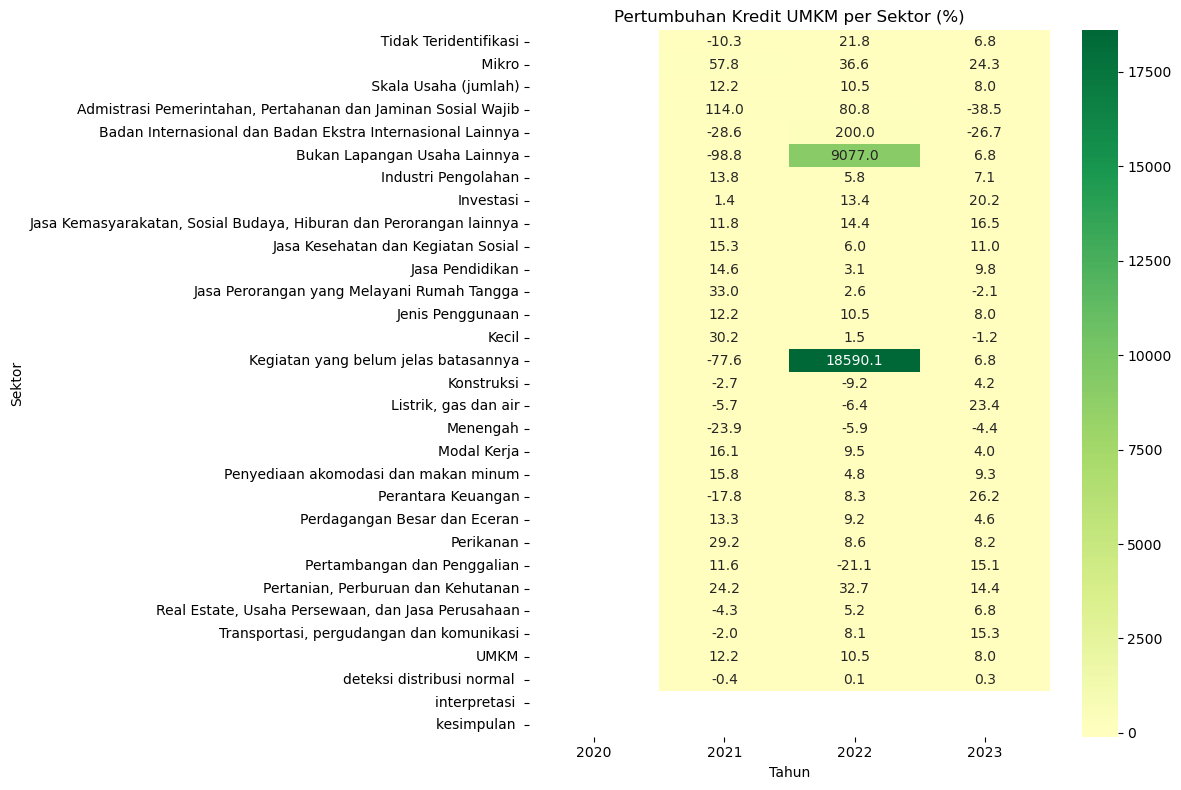

,Sektor,Kredit,Avg_Growth,Kredit_rank,Growth_rank,Final_score
1,Mikro,1832004.0,39.571429,6.0,5.0,5.5
2,Skala Usaha (jumlah),5115293.0,10.229511,2.0,13.0,7.5
27,UMKM,5115293.0,10.229511,2.0,13.0,7.5
12,Jenis Penggunaan,5115293.0,10.229511,2.0,13.0,7.5
24,"Pertanian, Perburuan dan Kehutanan",750636.0,23.739364,10.0,6.0,8.0
7,Investasi,1325969.0,11.674054,9.0,9.0,9.0
14,Kegiatan yang belum jelas batasannya,106992.0,6173.090247,19.0,1.0,10.0
5,Bukan Lapangan Usaha Lainnya,152722.5,2994.978431,18.0,2.0,10.0
8,"Jasa Kemasyarakatan, Sosial Budaya, Hiburan da...",266414.0,14.235754,12.0,8.0,10.0
18,Modal Kerja,3789325.0,9.888136,4.0,17.0,10.5


In [135]:
# 📌 Import pustaka
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Baca dan bersihkan data
df_raw = pd.read_excel (r"D:\Posisi Kredit Usaha Mikro, Kecil, dan Menengah (UMKM) pada Bank Umum__, 2020-2022 (1).xlsx" )
df_raw.columns = ['Sektor', '2020', '2021', '2022', '2023']
df_raw = df_raw[~df_raw['Sektor'].isna()]
df_raw = df_raw[df_raw['Sektor'] != 'Lapangan Usaha']

# 📌 Transformasi long format
df_long = df_raw.melt(id_vars='Sektor', var_name='Tahun', value_name='Kredit')
df_long['Tahun'] = df_long['Tahun'].astype(int)
df_long['Kredit'] = pd.to_numeric(df_long['Kredit'], errors='coerce')

# 📌 Hitung total kredit per sektor (2020–2023)
total_kredit_df = df_long.groupby('Sektor', as_index=False)['Kredit'].sum()

# 📌 Hitung pertumbuhan YoY per sektor
df_sorted = df_long.sort_values(by=['Sektor', 'Tahun'])
df_sorted['Growth'] = df_sorted.groupby('Sektor')['Kredit'].pct_change() * 100

# 📌 Hitung rata-rata pertumbuhan per sektor
growth_df = df_sorted.groupby('Sektor', as_index=False)['Growth'].mean().rename(columns={'Growth': 'Avg_Growth'})

# 📌 Visualisasi pertumbuhan per sektor (heatmap)
heatmap_data = df_sorted.pivot(index='Sektor', columns='Tahun', values='Growth')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='RdYlGn', center=0)
plt.title('Pertumbuhan Kredit UMKM per Sektor (%)')
plt.xlabel('Tahun')
plt.ylabel('Sektor')
plt.tight_layout()
plt.show()

# 📌 Gabungkan total kredit & growth untuk ranking
ranking_df = total_kredit_df.merge(growth_df, on='Sektor')
ranking_df['Kredit_rank'] = ranking_df['Kredit'].rank(ascending=False)
ranking_df['Growth_rank'] = ranking_df['Avg_Growth'].rank(ascending=False)
ranking_df['Final_score'] = (ranking_df['Kredit_rank'] + ranking_df['Growth_rank']) / 2
ranking_df = ranking_df.sort_values('Final_score')

# 📌 Tampilkan top sektor
ranking_df.head(10)

In [137]:
def classify_sector(row):
    if row['Kredit_rank'] <= 10 and row['Growth_rank'] <= 10:
        return 'Prioritas Tinggi'
    elif row['Kredit_rank'] <= 10:
        return 'Stabil Besar'
    elif row['Growth_rank'] <= 10:
        return 'Emerging (Potensial)'
    else:
        return 'Risiko / Anomali'

ranking_df['Kategori'] = ranking_df.apply(classify_sector, axis=1)
display(ranking_df.sort_values('Final_score'))


,Sektor,Kredit,Avg_Growth,Kredit_rank,Growth_rank,Final_score,Kategori
1,Mikro,1.832004e+06,39.571429,6.0,5.0,5.5,Prioritas Tinggi
2,Skala Usaha (jumlah),5.115293e+06,10.229511,2.0,13.0,7.5,Stabil Besar
27,UMKM,5.115293e+06,10.229511,2.0,13.0,7.5,Stabil Besar
12,Jenis Penggunaan,5.115293e+06,10.229511,2.0,13.0,7.5,Stabil Besar
24,"Pertanian, Perburuan dan Kehutanan",7.506360e+05,23.739364,10.0,6.0,8.0,Prioritas Tinggi
7,Investasi,1.325969e+06,11.674054,9.0,9.0,9.0,Prioritas Tinggi
14,Kegiatan yang belum jelas batasannya,1.069920e+05,6173.090247,19.0,1.0,10.0,Emerging (Potensial)
5,Bukan Lapangan Usaha Lainnya,1.527225e+05,2994.978431,18.0,2.0,10.0,Emerging (Potensial)
8,"Jasa Kemasyarakatan, Sosial Budaya, Hiburan da...",2.664140e+05,14.235754,12.0,8.0,10.0,Emerging (Potensial)
18,Modal Kerja,3.789325e+06,9.888136,4.0,17.0,10.5,Stabil Besar


In [139]:
cv_df = df_long.groupby('Sektor').agg(
    Kredit_Mean=('Kredit', 'mean'),
    Kredit_Std=('Kredit', 'std')
).reset_index()
cv_df['CV (%)'] = (cv_df['Kredit_Std'] / cv_df['Kredit_Mean']) * 100
display(cv_df.sort_values('CV (%)'))


,Sektor,Kredit_Mean,Kredit_Std,CV (%)
28,deteksi distribusi normal,2.084494e+00,0.004048,0.194178
25,"Real Estate, Usaha Persewaan, dan Jasa Perusahaan",5.118125e+04,2480.791188,4.847070
15,Konstruksi,5.587175e+04,3094.687100,5.538912
16,"Listrik, gas dan air",3.953000e+03,355.328017,8.988819
23,Pertambangan dan Penggalian,8.058500e+03,773.414292,9.597497
26,"Transportasi, pergudangan dan komunikasi",4.551200e+04,4682.604688,10.288725
6,Industri Pengolahan,1.303920e+05,13766.664399,10.557906
10,Jasa Pendidikan,8.368500e+03,888.873632,10.621660
21,Perdagangan Besar dan Eceran,6.187385e+05,68487.137627,11.068834
0,Tidak Teridentifikasi,4.851062e+04,5456.549541,11.248153


In [145]:
forecast_df = []

for sektor in df_long['Sektor'].unique():
    sub = df_long[df_long['Sektor'] == sektor]
    sub = sub.dropna(subset=['Tahun', 'Kredit'])  # Drop rows where either is NaN
    X = sub['Tahun'].values.reshape(-1, 1)
    y = sub['Kredit'].values

    if len(X) > 0 and len(y) > 0:  # Make sure there are still data points left
        model = LinearRegression().fit(X, y)
        pred_2024 = model.predict([[2024]])[0]
        forecast_df.append({'Sektor': sektor, 'Prediksi 2024': pred_2024})

forecast_2024 = pd.DataFrame(forecast_df)
display(forecast_2024.sort_values('Prediksi 2024', ascending=False))


,Sektor,Prediksi 2024
17,Jenis Penggunaan,1.587372e+06
27,Skala Usaha (jumlah),1.587372e+06
23,UMKM,1.587372e+06
18,Modal Kerja,1.162346e+06
24,Mikro,8.050710e+05
6,Perdagangan Besar dan Eceran,7.493815e+05
25,Kecil,5.175825e+05
19,Investasi,4.250260e+05
0,"Pertanian, Perburuan dan Kehutanan",2.870630e+05
26,Menengah,2.647185e+05


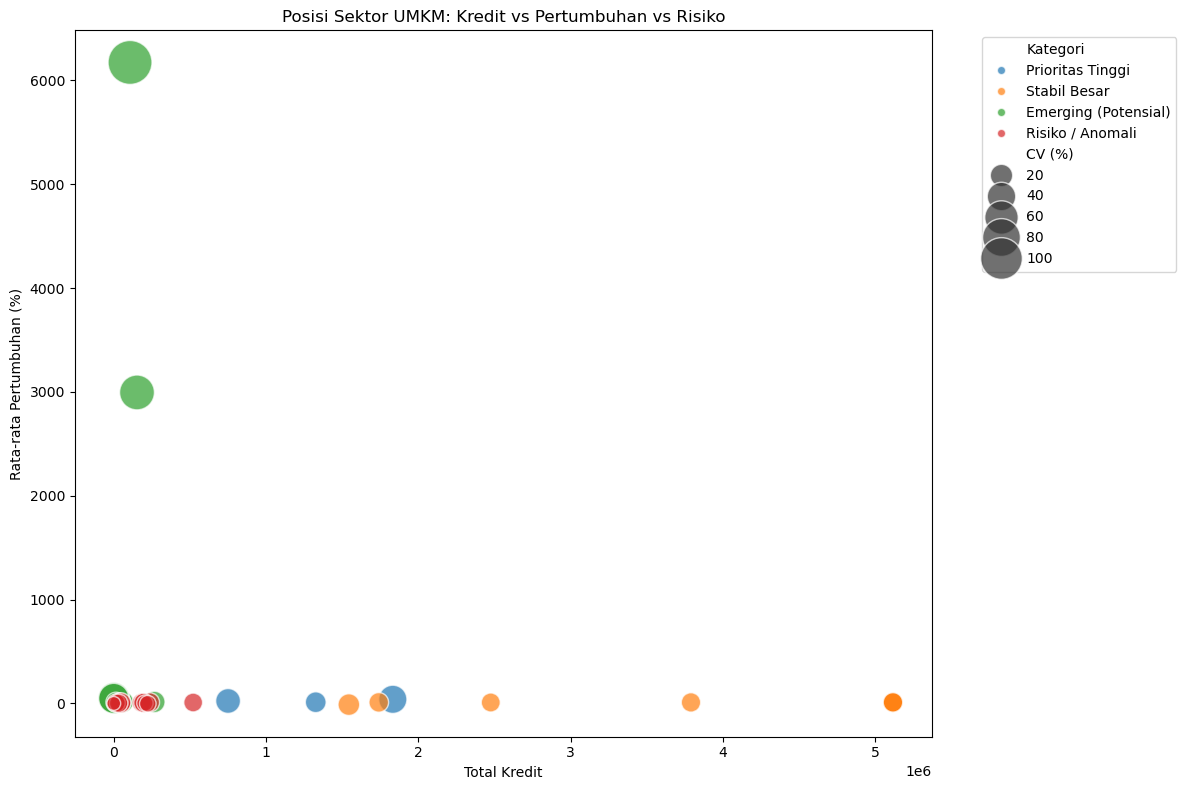

In [143]:
merged = ranking_df.merge(cv_df[['Sektor', 'CV (%)']], on='Sektor')
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=merged, x='Kredit', y='Avg_Growth', size='CV (%)', hue='Kategori', alpha=0.7, sizes=(100, 1000)
)
plt.title('Posisi Sektor UMKM: Kredit vs Pertumbuhan vs Risiko')
plt.xlabel('Total Kredit')
plt.ylabel('Rata-rata Pertumbuhan (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
